In [1]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
from torch import nn # 包含大量神经网络的层
from torch.nn import init # 提供了多种参数初始化方法
import torch.optim as optim # 提供了各种优化算法，如SGD,Adam

In [155]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0, 1, (num_examples, num_inputs)))
features = features.type(torch.float)
'''
np.random.normal(loc, scale, shape)
loc -- the avarage of all data you randomly generated
scale -- Variance
shape -- what does you data looks like
'''
lables = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
lables += torch.from_numpy(np.random.normal(0, 0.01, size=lables.size()))
lables = lables.type(torch.float)
'''
Here we add random a small data to create loss ourselves, aka to make some noises to our data
'''

'\nHere we add random a small data to create loss ourselves, aka to make some noises to our data\n'

In [156]:
print(features[0], lables[0])

tensor([1.1932, 0.8502]) tensor(3.6943)


C:\Users\Katono\AppData\Local\Temp\ipykernel_14536\733985114.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


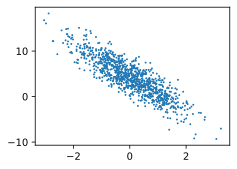

In [157]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].numpy(), lables.numpy(), 1)

In [158]:
import torch.utils.data as Data

batch_size = 10
dataset = Data.TensorDataset(features, lables)
data_iter = Data.DataLoader(dataset, batch_size, shuffle=False)
for X, y in data_iter:
    X = X.type(torch.float)
    y = y.type(torch.float)
    print(X)
    print(y)
    break

tensor([[ 1.1932,  0.8502],
        [-0.6284,  1.2364],
        [-1.2264, -0.8587],
        [ 0.5361,  0.5126],
        [ 0.4882, -1.3050],
        [ 0.6332, -1.0971],
        [ 0.3118, -1.1065],
        [ 0.7468,  0.7307],
        [-0.8635,  1.0196],
        [ 1.3354, -0.5564]])
tensor([ 3.6943, -1.2363,  4.6693,  3.5216,  9.6226,  9.1995,  8.5891,  3.2122,
        -0.9895,  8.7600])


In [159]:
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
    def forward(self, x):
        # forward用于定义前向传播
        y = self.linear(x)
        return y

net = LinearNet(num_inputs)
print(net)

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [160]:
# 此处尝试用nn.Sequential来更方便的搭建网络

# 写法一
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
)
print(net)

#写法二
net = nn.Sequential()
net.add_module('Linear', nn.Linear(num_inputs, 1))
print(net)

for param in net.parameters():
    print(param)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)
Sequential(
  (Linear): Linear(in_features=2, out_features=1, bias=True)
)
Parameter containing:
tensor([[-0.3943, -0.5815]], requires_grad=True)
Parameter containing:
tensor([0.1167], requires_grad=True)


In [161]:
# 此步可以初始化模型的参数，使均值为0，标准差为0.01
init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(net[0].bias, val=0)
# 此步定义损失函数
loss = nn.MSELoss()

In [162]:
optimizer = optim.SGD(net.parameters(), lr=0.03) # lr=learning rate
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.03
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [164]:
# 训练模型
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X).type(torch.float)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad() # 梯度清零
        l.backward()
        optimizer.step()
    print('epoch %d, loss %f' % (epoch, l.item()))

epoch 1, loss 0.000138
epoch 2, loss 0.000138
epoch 3, loss 0.000138


In [166]:
dense = net[0]
print(true_w, dense.weight)
print(true_b, dense.bias)

[2, -3.4] Parameter containing:
tensor([[ 1.9990, -3.4002]], requires_grad=True)
4.2 Parameter containing:
tensor([4.1998], requires_grad=True)


# 小节
这一章节我们学到了：
- Pytorch可以简洁地实现模型
- torch.utils.data模块提供的数据处理的工具
- torch.nn定义了大量神经网络的层
- torch.nn.init模块定义了各种初始化方法
- torch.optim提供了模型参数初始化的各种方法
此外，还有一个大坑需要注意：
- torch.from_numpy默认返回float64精度
- torch中主动创建的ndarray精度默认为float32
- 因此不经过调精度可能会报错**RuntimeError: mat1 and mat2 must have the same dtype**